This workbook is to identify the top 10 stocks in NASDAQ that had the highest drop in stock price in a single day. 
We will pick one of the top 5 stocks with the highest drop in stock price in a single day to model and predict their share price the following day. 

In [1]:
#Importing libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd

# from datetime import date
import datetime

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


# obtaining the data from YahooFinance

In [4]:
#getting today's date
today = datetime.datetime.today().strftime('%Y-%m-%d')
today

'2021-04-29'

In [25]:
#getting last 5years worth of data
startdate = datetime.datetime.today() - datetime.timedelta(days=(365*5))
startdate = startdate.strftime('%Y-%m-%d')
# startdate = today.replace(year=today.year-3)
print(startdate)
#for filtering data (based on 5 days)
startdate_filter = datetime.datetime.today() - datetime.timedelta(days=5)
startdate_filter = startdate_filter.strftime('%Y-%m-%d')
startdate_filter
print(startdate_filter)

2016-04-30
2021-04-24


# downloaded the stock lists from the website below
#NASDAQ
https://www.nasdaq.com/market-activity/stocks/screener?exchange=nasdaq&letter=0&render=download

#AMEX
https://www.nasdaq.com/market-activity/stocks/screener?exchange=amex&letter=0&render=download

#NYSE
https://www.nasdaq.com/market-activity/stocks/screener?exchange=nyse&letter=0&render=download


In [7]:
#reading the lists of nasdaq companies
nasdaq = pd.read_csv("nasdaq_lists.csv")
#selecting only the first column which contains the stock codes
nasdaq_list = nasdaq.iloc[:, 0].values
# nasdaq_list = nasdaq_list[:20] # only selecting few for testing
nasdaq_list

array(['AAL', 'AAON', 'AAPL', ..., 'ZUMZ', 'ZVO', 'ZY'], dtype=object)

In [9]:
# getting multiple stocks to filter
# stocks = ['AAPL','AMD','MSFT','']
stocks = nasdaq_list

In [11]:
# obtaining the data and calculating the daily return
# this will take a while to run as we are going through over 1600 listed firms
current_PED = []
current_price_change = []

for i in stocks:
    # making sure to use the startdate_filter which has shorter date
    df = web.DataReader(i, data_source='yahoo', start=startdate_filter, 
                   end=today)
    print(i)
    
    #calculate PED
    # percentage change in price
    df['change_in_price'] = ((df['Adj Close']-df['Adj Close'].shift(1))/((df['Adj Close']+df['Adj Close'].shift(1))/2))*100
    # percentage change in demand
    df['change_in_quant'] = ((df['Volume']-df['Volume'].shift(1))/((df['Volume']+df['Volume'].shift(1))/2))*100
    # Price Elasticity of Demand (PED)
    df['PED'] = abs(df['change_in_quant']/df['change_in_price'])
    
    #appending the PED for the most recent data
    current_PED.append(df.iloc[-1: ]['PED'].values)
#     print(current_PED)
    current_price_change.append(df.iloc[-1: ]['change_in_price'].values)
#     print(current_price_change)
    
#     return current_PED


AAL
AAON
AAPL
AAWW
ABCB
ABCL
ABCM
ABMD
ABNB
ABST
ABUS
ACAD
ACBI
ACCD
ACGL
ACGLO
ACGLP
ACHC
ACHL
ACIW
ACLS
ACOR
ACRS
ACTG
ACVA
ADAP
ADBE
ADI
ADP
ADPT
ADSK
ADTN
ADUS
ADV
ADVWW
AEGN
AEIS
AEP
AEPPL
AEPPZ
AFIB
AFIN
AFINO
AFINP
AFRM
AFYA
AGFS
AGIO
AGNC
AGNCM
AGNCN
AGNCO
AGNCP
AGYS
AIMC
AINV
AKAM
AKRO
AKUS
AKYA
ALCO
ALEC
ALGM
ALGN
ALGS
ALGT
ALHC
ALKS
ALKT
ALLK
ALLO
ALLT
ALNA
ALNY
ALRM
ALSK
ALTR
ALVR
ALXN
ALXO
AMAT
AMBA
AMCX
AMD
AMED
AMGN
AMKR
AMNB
AMPH
AMRB
AMRK
AMRS
AMSC
AMSF
AMSWA
AMTB
AMTBB
AMTI
AMWD
AMYT
AMZN
ANAB
ANAT
ANDE
ANGI
ANGN
ANGO
ANIK
ANNX
ANSS
AOSL
AOUT
APA
APEI
APHA
API
APLS
APOG
APP
APPH
APPHW
APR
APRE
APTX
APYX
ARAV
ARAY
ARCB
ARCC
ARCE
ARGX
ARLP
ARNA
AROW
ARQT
ARTNA
ARVL
ARVLW
ARVN
ARWR
ASMB
ASML
ASND
ASO
ASPS
ASTE
ASYS
ATAX
ATEC
ATHA
ATLC
ATNI
ATNX
ATRA
ATRI
ATRO
ATSG
ATVI
AUB
AUBAP
AUDC
AUTL
AVAV
AVGO
AVGOP
AVID
AVIR
AVNW
AVO
AVRO
AVT
AXNX
AXON
AXTI
AY
AZN
AZPN
BAND
BANF
BANFP
BANR
BANX
BATRA
BATRK
BBBY
BBIO
BBQ
BBSI
BCEL
BCML
BCOR
BCOV
BCPC
BCRX
BCYC
BDSI
BDTX
BEAM
BECN
BE

ZG
ZI
ZION
ZIOP
ZIXI
ZM
ZNGA
ZS
ZUMZ
ZVO
ZY


In [12]:
#creating a dataframe to filter
data_filter = pd.DataFrame(stocks, columns=['Code'])
data_filter['current_price_change'] = pd.DataFrame(current_price_change)
data_filter['current_PED'] = pd.DataFrame(current_PED)
data_filter

,Code,current_price_change,current_PED
0,AAL,-0.276114,63.027059
1,AAON,-0.614751,97.988331
2,AAPL,-0.604543,77.766719
3,AAWW,0.750909,80.483249
4,ABCB,0.992171,10.673398
...,...,...,...
1658,ZNGA,0.362318,93.925629
1659,ZS,-0.260633,178.932474
1660,ZUMZ,-0.456310,24.731567
1661,ZVO,-0.266311,297.090524


# Saving to csv

In [13]:
#saving the file
data_filter.to_csv('NASDAQ_price_change.csv')

# using the saved file

In [10]:
data_filter = pd.read_csv('NASDAQ_price_change.csv')
data_filter = data_filter.drop(['Unnamed: 0'], axis=1)
data_filter

,Code,current_price_change,current_PED
0,AAL,-0.276114,63.027059
1,AAON,-0.614751,97.988331
2,AAPL,-0.604543,77.766719
3,AAWW,0.750909,80.483249
4,ABCB,0.992171,10.673398
...,...,...,...
1658,ZNGA,0.362318,93.925629
1659,ZS,-0.260633,178.932474
1660,ZUMZ,-0.456310,24.731567
1661,ZVO,-0.266311,297.090524


In [11]:
#there are values with 0 change in price
#drop these variables
data_filter1 = data_filter.loc[data_filter['current_PED']!=np.inf]

In [12]:
data_filter1.sort_values(by='current_price_change').head(10)

,Code,current_price_change,current_PED
1286,RVMD,-23.244868,7.599152
166,AVIR,-23.070536,5.572924
1505,TUSK,-11.207966,13.933092
554,FFIV,-9.509234,11.148913
1103,ORPH,-8.421045,15.951508
400,CSGP,-8.298130,11.204546
352,CMPS,-8.222109,8.218846
126,ARAY,-8.219179,10.592155
688,HELE,-8.186153,9.287451
1246,RCKY,-7.815595,2.513074


In [23]:
data_filter1.sort_values(by='current_PED', ascending=False).head(10)

,Code,current_price_change,current_PED
648,GOODM,0.003947,19083.066620
547,FDUSG,0.015538,12871.932761
241,BPYPN,-0.004079,5847.129421
563,FITBO,0.007308,5721.988602
1306,SBLKZ,-0.038389,3125.924685
853,LAMR,-0.010133,3096.670416
661,GSBC,0.017833,3037.762037
504,ENTG,0.008714,2736.141908
382,CPTAL,0.039581,2565.310550
325,CHNG,-0.043132,2403.038296


# A quick glance at the stock

In [26]:
# get the stock quote
df = web.DataReader('TUSK', data_source='yahoo', start=startdate, 
                   end=today)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-10-14,14.290,12.63,13.66,13.26,5896600.0,12.968104
2016-10-17,14.090,13.06,13.20,13.87,882300.0,13.564677
2016-10-18,14.040,13.75,13.89,13.93,387500.0,13.623357
2016-10-19,14.460,13.90,14.17,14.37,519500.0,14.053671
2016-10-20,14.500,14.19,14.36,14.33,325400.0,14.014551
...,...,...,...,...,...,...
2021-04-22,4.380,4.14,4.18,4.24,179900.0,4.240000
2021-04-23,4.362,4.14,4.25,4.17,51500.0,4.170000
2021-04-26,4.400,4.17,4.18,4.29,128300.0,4.290000


In [27]:
# percentage change in price
df['change_in_price'] = ((df['Adj Close']-df['Adj Close'].shift(1))/((df['Adj Close']+df['Adj Close'].shift(1))/2))*100
# percentage change in demand
df['change_in_quant'] = ((df['Volume']-df['Volume'].shift(1))/((df['Volume']+df['Volume'].shift(1))/2))*100
# Price Elasticity of Demand (PED)
df['PED'] = abs(df['change_in_quant']/df['change_in_price'])

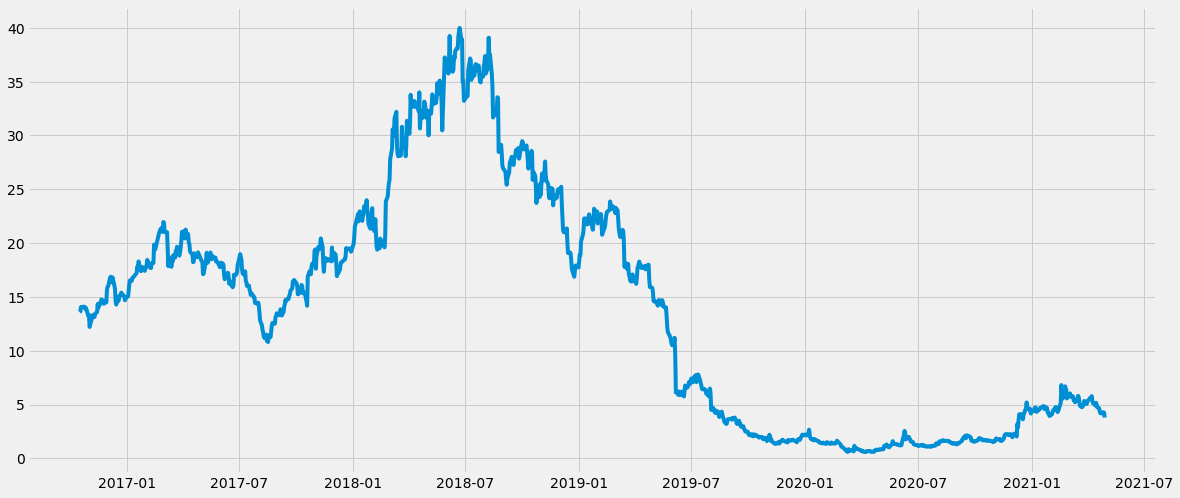

In [34]:
plt.figure(figsize=(18,8))
plt.plot(df['Adj Close'])

Text(0.5, 0, '% change in price')

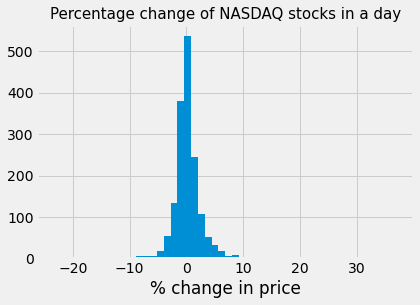

In [27]:
plt.hist(data_filter1['current_price_change'], bins=50)
plt.title('Percentage change of NASDAQ stocks in a day', size=15)
plt.xlabel('% change in price')

In [20]:
data_filter1.describe()

,current_price_change,current_PED
count,1617.000000,1614.000000
mean,0.195809,138.937488
std,2.542286,669.678443
min,-23.244868,0.038644
25%,-0.879603,11.329795
50%,0.070648,28.349034
75%,1.052891,81.092089
max,36.947794,19083.066620


In [21]:
data_filter1.describe().T

,count,mean,std,min,25%,50%,75%,max
current_price_change,1617.0,0.195809,2.542286,-23.244868,-0.879603,0.070648,1.052891,36.947794
current_PED,1614.0,138.937488,669.678443,0.038644,11.329795,28.349034,81.092089,19083.066620
